# Pytorch Framework for Multi-class Text Classification

Sec Filing event extraction- 3 Class Problem

* 
* Class Labels: 3 <br/>

    0 - Acquire <br/>
    1 - Expansion <br/>
    2 - Scam <br/>  

## Reading Data

In [ ]:
%%bash
source activate myenv

bash: line 1: activate: No such file or directory


In [ ]:
!pip install tensorflow==1.15.2
print('_____')
!pip install tensorflow-gpu==1.15.2


     |████████████████████████████████| 110.5 MB 43 kB/s 
     |████████████████████████████████| 503 kB 69.8 MB/s 
     |████████████████████████████████| 3.8 MB 50.0 MB/s 
     |████████████████████████████████| 50 kB 9.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=da60f7d4cb96d5541e1a49f8ab4c6a390ebbd28784666ebb38c8e97660941cca
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
!pip install bert-tensorflow
!pip install torch==1.5.1
!pip install torchvision==0.6.1
!pip install transformers==2.11.0

     |████████████████████████████████| 64 kB 2.4 MB/s 
     |████████████████████████████████| 753.2 MB 13 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.5.1 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.5.1 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.5.1 which is incompatible.
     |████████████████████████████████| 6.6 MB 6.4 MB/s 
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
     |████

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
import transformers
print(transformers.__version__)

2.11.0


In [ ]:
import torchvision
print(torchvision.__version__)

0.6.1


In [ ]:
import torch
print(torch.__version__)

1.5.1


In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn

sys.path.append("..")
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [ ]:
df_train = pd.read_csv('../content/train.csv')
df_test = pd.read_csv('../content/test.csv')
df_score = pd.read_csv('../content/test_with_label.csv')
df_val = pd.read_csv('../content/dev.csv')
df_train.shape, df_test.shape, df_val.shape

((6657, 3), (1665, 2), (666, 3))

In [ ]:
df_train.label.unique()

array([0, 2, 1])

In [ ]:
df_score.label.unique()

array([0, 1, 2])

In [ ]:
df_val.label.unique()

array([0, 1, 2])

In [ ]:
df_train.label.value_counts()

0    3053
1    2117
2    1487
Name: label, dtype: int64

In [ ]:
df_val.label.value_counts()

0    305
1    212
2    149
Name: label, dtype: int64

In [ ]:
df_score.label.value_counts()

0    764
1    529
2    372
Name: label, dtype: int64

In [ ]:
df_test.shape

(1665, 2)

## Training Transformers (Albert DistilBert) classifier with FrameWork

In [ ]:
!pip install classitransformers

     |████████████████████████████████| 51 kB 679 kB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=806601bf9ad18c373933ebcaaf6fa37a8c8778e9453b8ec99a2ecedc57d5aa19
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from classitransformers.report import metrics
from classitransformers.configs import Configs
from classitransformers.pytransformers import TransformersClassification

In [ ]:
from classitransformers.downloader import downloader

In [ ]:
downloader('distilbert')

Model gets downloaded here:  ../models/DistilBert


## Set Configurations

* Pre-trained folderpath
* labels list
* train, test and eval batch size
* max_seq_len - how long is the each text input sentence !!
* data_dir - data path folder (optional)
* output_dir - output path folder (optional)

In [ ]:
# config = Configs(
#                 pretrained_model_dir = '../models/DistilBert',
#                 model_name = 'distilbert',
#                 num_train_epochs=3,
#                 train_batch_size = 16,
#                 eval_batch_size = 8, 
#                 do_train = True, 
#                 do_eval = True,
#                 max_seq_length = 128,
#                 label_list = [0,1,2],
#                 data_dir = '../content',
#                 output_dir = '../transformers_output_secfiling/')

config = Configs(
                # pretrained_model_dir = '../models/Albert',
                pretrained_model_dir = '../transformers_output_secfiling/', #for testing
                model_name = 'distilbert', 
                num_train_epochs=3,
                train_batch_size = 16,
                eval_batch_size = 8, 
                #  do_train = True, 
                do_train = False, # for testing
                do_eval = True,
                max_seq_length = 128,
                label_list = [0,1,2],
                data_dir = '../content'
                # output_dir = '../transformers_output_secfiling/'
                )


In [ ]:
model = TransformersClassification(config)

In [ ]:
config2 = Configs(
                # pretrained_model_dir = '../models/DistilBert',
                pretrained_model_dir = '../transformers_output_secfiling/', #for testing
                model_name = 'distilbert', 
                num_train_epochs=3,
                train_batch_size = 16,
                eval_batch_size = 8, 
                #  do_train = True, 
                do_train = False, # for testing
                do_eval = True,
                max_seq_length = 128,
                learning_rate = 5e-5,
                label_list = [0,1,2],
                data_dir = '../content',
                # output_dir = '../transformers_output_secfiling/'
                )

# config2 = Configs(
#                 pretrained_model_dir = '../models/DistilBert',                
#                 model_name = 'distilbert', 
#                 num_train_epochs=3,
#                 train_batch_size = 16,
#                 eval_batch_size = 8, 
#                  do_train = True,                
#                 do_eval = True,
#                 max_seq_length = 128,
#                 learning_rate = 5e-5,
#                 label_list = [0,1,2],
#                 data_dir = '../content',
#                 output_dir = '../transformers_output_secfiling/'
#                 )
                 

In [ ]:
model2 = TransformersClassification(config2)

## Train Method

In [ ]:
model.train()


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    417.    Elapsed: 0:00:04.
  Batch    80  of    417.    Elapsed: 0:00:08.
  Batch   120  of    417.    Elapsed: 0:00:13.
  Batch   160  of    417.    Elapsed: 0:00:17.
  Batch   200  of    417.    Elapsed: 0:00:21.
  Batch   240  of    417.    Elapsed: 0:00:25.
  Batch   280  of    417.    Elapsed: 0:00:30.
  Batch   320  of    417.    Elapsed: 0:00:34.
  Batch   360  of    417.    Elapsed: 0:00:38.
  Batch   400  of    417.    Elapsed: 0:00:42.

  Average training loss: 0.07
  Training epcoh took: 0:00:44

Running Validation...
  Accuracy: 0.99
  Validation Loss: 0.00
  Validation took: 0:00:01

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    417.    Elapsed: 0:00:04.
  Batch    80  of    417.    Elapsed: 0:00:08.
  Batch   120  of    417.    Elapsed: 0:00:13.
  Batch   160  of    417.    Elapsed: 0:00:17.
  Batch   200  of    417.    Elapsed: 0:00:21.
  Batch   240  of    417.    Elapsed: 0:00:25.
  Batch  

## Test Method

In [ ]:
prediction = model.test()

**Testing a sentence, takes a list of sentences.**

In [ ]:
model.text_inference(['He is very good in writing a book on financial investment money making strategy. There are some transactional charges but the profit we make is awesome. The business people are exchanging bulk money over trades happening every seconds. Even retailers are happy doing trade and adding sum to their investments.'])

[array([0.9946366 , 0.02816704, 0.05836164], dtype=float32)]

In [ ]:
y_pred = [np.argmax(tup) for tup in prediction]
y = df_score.label

## Accuracy and Report



Accuracy: 0.920
Precision: 0.922
Recall: 0.914
F1-Score: 0.918


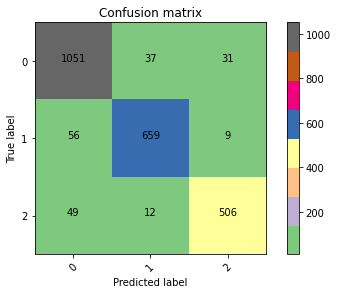

In [ ]:
metrics(y, y_pred)

Model 2


In [ ]:
model2.train()


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    417.    Elapsed: 0:00:04.
  Batch    80  of    417.    Elapsed: 0:00:08.
  Batch   120  of    417.    Elapsed: 0:00:13.
  Batch   160  of    417.    Elapsed: 0:00:17.
  Batch   200  of    417.    Elapsed: 0:00:21.
  Batch   240  of    417.    Elapsed: 0:00:25.
  Batch   280  of    417.    Elapsed: 0:00:30.
  Batch   320  of    417.    Elapsed: 0:00:34.
  Batch   360  of    417.    Elapsed: 0:00:38.
  Batch   400  of    417.    Elapsed: 0:00:42.

  Average training loss: 0.06
  Training epcoh took: 0:00:44

Running Validation...
  Accuracy: 0.99
  Validation Loss: 0.00
  Validation took: 0:00:01

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    417.    Elapsed: 0:00:04.
  Batch    80  of    417.    Elapsed: 0:00:08.
  Batch   120  of    417.    Elapsed: 0:00:13.
  Batch   160  of    417.    Elapsed: 0:00:17.
  Batch   200  of    417.    Elapsed: 0:00:21.
  Batch   240  of    417.    Elapsed: 0:00:25.
  Batch  

In [ ]:
prediction2 = model2.test()

In [ ]:
y_pred2 = [np.argmax(tup) for tup in prediction2]
y = df_score.label



Accuracy: 0.911
Precision: 0.910
Recall: 0.907
F1-Score: 0.908


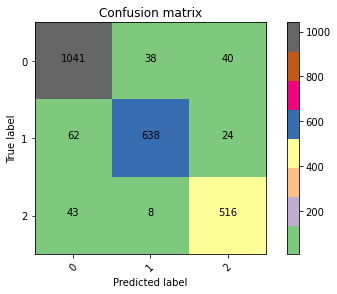

In [ ]:
metrics(y, y_pred2)

Model3


In [ ]:
config3 = Configs(
                pretrained_model_dir = '../models/DistilBert',
                model_name = 'distilbert',
                num_train_epochs=3,
                train_batch_size = 16,
                eval_batch_size = 8, 
                do_train = True, 
                do_eval = True,
                max_seq_length = 500,
                learning_rate = 5e-5,
                label_list = [0,1,2],
                data_dir = '../content',
                output_dir = '../transformers_output_secfiling/')
                 
# config3 = Configs(
#                 # pretrained_model_dir = '../models/DistilBert',
#                 pretrained_model_dir = '../transformers_output_secfiling/', #for testing
#                 model_name = 'distilbert', 
#                 num_train_epochs=3,
#                 train_batch_size = 16,
#                 eval_batch_size = 8, 
#                 #  do_train = True, 
#                 do_train = False, # for testing
#                 do_eval = True,
#                 max_seq_length = 500,
#                 learning_rate = 5e-5,
#                 label_list = [0,1,2],
#                 data_dir = '../content'
#                 # output_dir = '../transformers_output_secfiling/'
#                 )


In [ ]:
model3 = TransformersClassification(config3)

In [ ]:
model3.train()


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    417.    Elapsed: 0:00:17.
  Batch    80  of    417.    Elapsed: 0:00:34.
  Batch   120  of    417.    Elapsed: 0:00:51.
  Batch   160  of    417.    Elapsed: 0:01:08.
  Batch   200  of    417.    Elapsed: 0:01:25.
  Batch   240  of    417.    Elapsed: 0:01:42.
  Batch   280  of    417.    Elapsed: 0:01:59.
  Batch   320  of    417.    Elapsed: 0:02:16.
  Batch   360  of    417.    Elapsed: 0:02:33.
  Batch   400  of    417.    Elapsed: 0:02:50.

  Average training loss: 0.37
  Training epcoh took: 0:02:57

Running Validation...
  Accuracy: 0.98
  Validation Loss: 0.00
  Validation took: 0:00:06

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    417.    Elapsed: 0:00:17.
  Batch    80  of    417.    Elapsed: 0:00:34.
  Batch   120  of    417.    Elapsed: 0:00:51.
  Batch   160  of    417.    Elapsed: 0:01:08.
  Batch   200  of    417.    Elapsed: 0:01:25.
  Batch   240  of    417.    Elapsed: 0:01:42.
  Batch  

In [ ]:
prediction3 = model3.test()

In [ ]:
y_pred3 = [np.argmax(tup) for tup in prediction3]
y = df_score.label



Accuracy: 0.959
Precision: 0.958
Recall: 0.959
F1-Score: 0.958


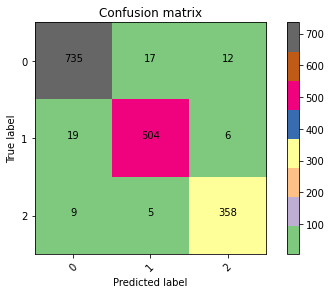

In [ ]:
metrics(y, y_pred3)



Accuracy: 0.948
Precision: 0.943
Recall: 0.951
F1-Score: 0.947


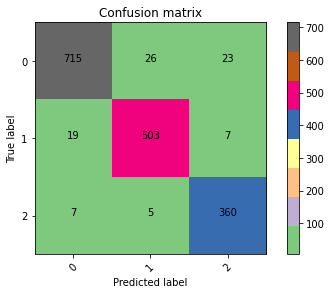

In [ ]:
metrics(y, y_pred3)

In [ ]:
import torch
torch.save(model3, '../content/albert_trained3')

# saved_model = torch.load('path/to/model')

In [ ]:
import torch
torch.save(model2, '../content/albert_trained2')

# saved_model = torch.load('path/to/model')

In [ ]:
import torch
torch.save(model, '../content/albert_trained')

# saved_model = torch.load('path/to/model')